# Домашнее задание 2.

Продолжаем знакомиться с библиотекой `tensorflow`.

## Шикунов Николай ИАД-2

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

In [71]:
import time

In [83]:
loop = range(500, 7000, 500)

In [84]:
def plot_tf_np(tf_time, np_time, title):
    plt.figure(figsize=(10, 5))
    plt.plot(loop, tf_time, label="TensorFlow")
    plt.plot(loop, np_time, label="Numpy")
    plt.yscale("log")
    plt.legend()
    plt.title(title)
    plt.xlabel('Matrix size')
    plt.ylabel('Log time')
    plt.show()

In [85]:
sess = tf.Session()
tf_diag_time = []
for n in loop:
    x = tf.random.uniform([n, n])
    y = tf.reduce_sum(tf.diag_part(x) ** 2)

    begin = time.time()
    sess.run(y)
    end = time.time()
    time_spent = end - begin
    tf_diag_time.append(time_spent)
sess.close()

In [86]:
np_diag_time = []
for n in loop:
    x = np.random.uniform(size=(n, n))
    begin = time.time()
    np.sum(x.diagonal() ** 2)
    end = time.time()
    time_spent = end - begin
    np_diag_time.append(time_spent)

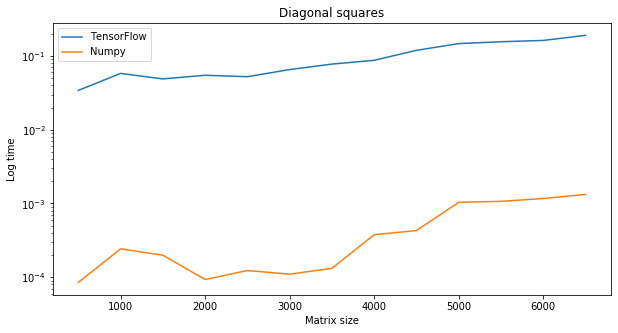

In [87]:
plot_tf_np(tf_diag_time, np_diag_time, 'Diagonal squares')

Numpy быстрее

In [88]:
sess = tf.Session()
tf_arc_time = []
for n in loop:
    x = tf.random.uniform([n])
    y = tf.random.uniform([n])
    
    z = tf.acos(tf.tensordot(x, y, 1) / (tf.norm(x) * tf.norm(y)))
    
    begin = time.time()
    sess.run(z)
    end = time.time()
    time_spent = end - begin
    tf_arc_time.append(time_spent)
sess.close()

In [89]:
np_arc_time = []
for n in loop:
    x = np.random.uniform(size=(n))
    y = np.random.uniform(size=(n))
    begin = time.time()
    np.arccos(np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y)))
    end = time.time()
    time_spent = end - begin
    np_arc_time.append(time_spent)

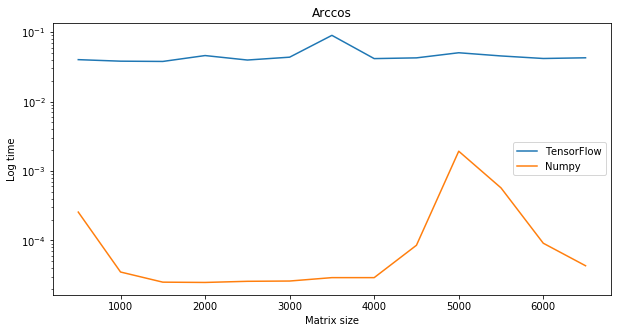

In [90]:
plot_tf_np(tf_arc_time, np_arc_time, 'Arccos')

Numpy быстрее

In [91]:
sess = tf.Session()
tf_com_time = []
for n in loop:
    x = tf.random.uniform(shape= (n, n))
    y = tf.random.uniform(shape= (n, n))
    
    z = tf.matmul(x, y) - tf.matmul(y, x)
    
    begin = time.time()
    sess.run(z)
    end = time.time()
    time_spent = end - begin
    tf_com_time.append(time_spent)
sess.close()

In [92]:
np_com_time = []
for n in loop:
    x = np.random.uniform(size=(n, n))
    y = np.random.uniform(size=(n, n))
    begin = time.time()
    np.dot(x, y) - np.dot(y, x)
    end = time.time()
    time_spent = end - begin
    np_com_time.append(time_spent)

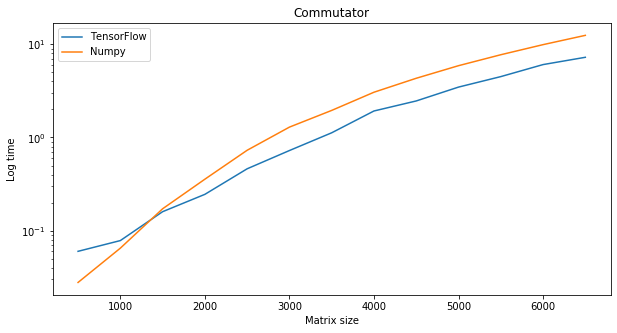

In [93]:
plot_tf_np(tf_com_time, np_com_time, 'Commutator')

До матрицы 1000х1000 Numpy быстрее, но потом tf быстрее

Возможно, Numpy быстрее тк тф изначально создавался для вычислений на gpu.

## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [2]:
from sklearn.datasets import load_digits

mnist = load_digits()

X, y = mnist.data, mnist.target

n_labels = len(np.unique(y))

Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

**Задание 2.1** (1.5 балла). Исследуйте вклад параметра momentum в методу `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте графики значения функции потерь от номера итерации. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [3]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

predicted = tf.nn.softmax(X_input @ w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted)

W1001 20:16:09.492375 4663289280 deprecation.py:323] From /Users/nikolaysafonov/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [46]:
def train(X, y, train_op, batch_size=16, epoch=1):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        for epoch in range(epoch):
            loss_history = np.array([])
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history = np.append(loss_history, loss_)
    return loss_history

Momentum 0.6: mean:0.1084 var:0.0048
Momentum 0.65: mean:0.1036 var:0.0048
Momentum 0.7: mean:0.0989 var:0.0048
Momentum 0.75: mean:0.0947 var:0.0049
Momentum 0.8: mean:0.092 var:0.0051
Momentum 0.85: mean:0.094 var:0.0056
Momentum 0.9: mean:0.1032 var:0.0078


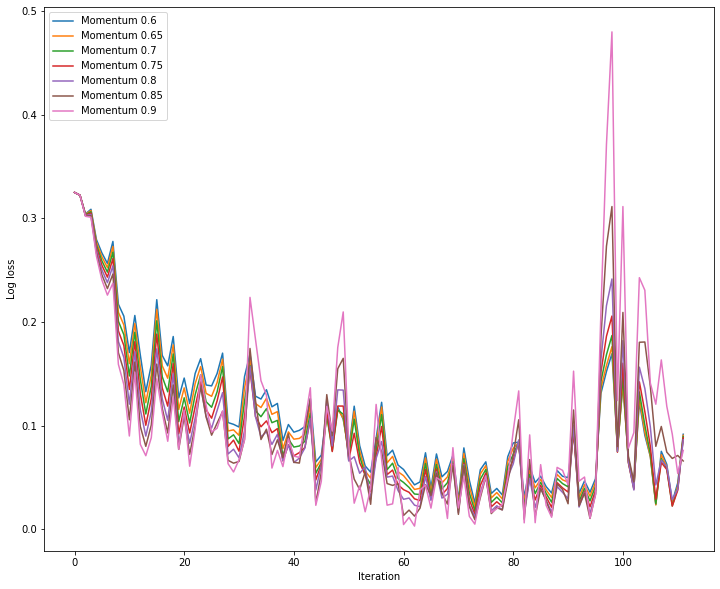

In [34]:
plt.figure(figsize=(12, 10))
for i in [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]:
    train_op = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=i).minimize(loss)
    loss_i = train(X, y, train_op)
    plt.plot(np.arange(len(X) // 16), loss_i, label=f"Momentum {i}")
    print(f"Momentum {i}: mean:{round(loss_i.mean(), 4)} var:{round(loss_i.var(), 4)}")
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Log loss')
plt.show()

При увеличении моментума повышается разброс

**Задание 2.2** (0.5 баллa). Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте параметр метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

Learning rate 0.0001: mean:0.31 var:0.0001
Learning rate 0.001: mean:0.2139 var:0.0035
Learning rate 0.01: mean:0.092 var:0.0051
Learning rate 0.02: mean:0.093 var:0.0058
Learning rate 0.03: mean:0.1087 var:0.0086
Learning rate 0.04: mean:0.1284 var:0.0134


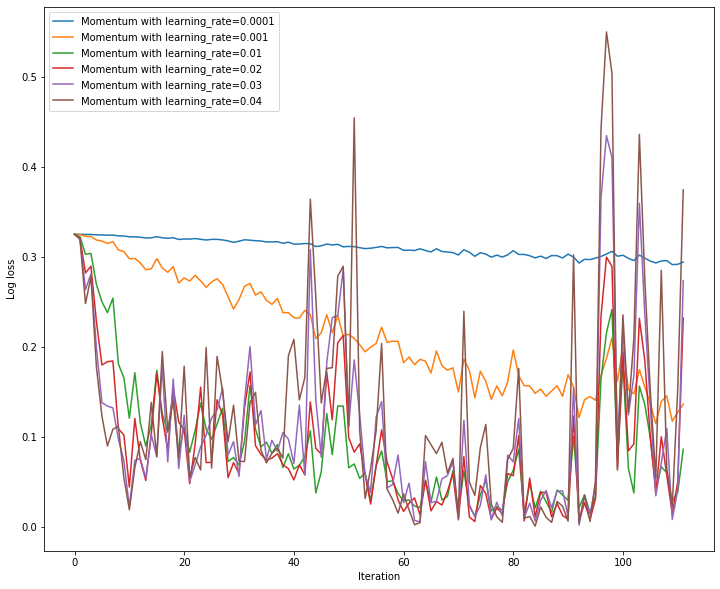

In [39]:
plt.figure(figsize=(12, 10))
for i in [0.0001, 0.001, 0.01, 0.02, 0.03, 0.04]:
    train_op = tf.train.MomentumOptimizer(learning_rate=i, momentum=0.8).minimize(loss)
    loss_i = train(X, y, train_op)
    plt.plot(np.arange(len(X) // 16), loss_i, label=f"Momentum with learning_rate={i}")
    print(f"Learning rate {i}: mean:{round(loss_i.mean(), 4)} var:{round(loss_i.var(), 4)}")
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Log loss')
plt.show()

Большой learning rate увеличивает разброс, а маленький learning rate сходится медленнее

**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

Learning rate 0.0001: mean:0.2863 var:0.0005
Learning rate 0.001: mean:0.1374 var:0.0049
Learning rate 0.01: mean:0.0878 var:0.0074
Learning rate 0.02: mean:0.1639 var:0.0217
Learning rate 0.03: mean:0.2924 var:0.0458
Learning rate 0.04: mean:0.8615 var:0.1082


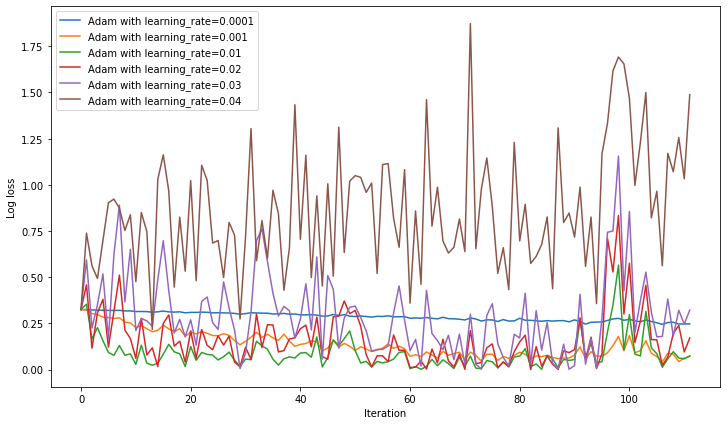

In [41]:
plt.figure(figsize=(12, 7))
for i in [0.0001, 0.001, 0.01, 0.02, 0.03, 0.04]:
    train_op = tf.train.AdamOptimizer(learning_rate=i).minimize(loss)
    loss_i = train(X, y, train_op)
    plt.plot(np.arange(len(X) // 16), loss_i, label=f"Adam with learning_rate={i}")
    print(f"Learning rate {i}: mean:{round(loss_i.mean(), 4)} var:{round(loss_i.var(), 4)}")
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Log loss')
plt.show()

Большой learning rate увеличивает разброс, а маленький learning rate сходится медленнее

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

Momentum: mean:0.0317 var:0.0025
Adam: mean:0.0699 var:0.0143


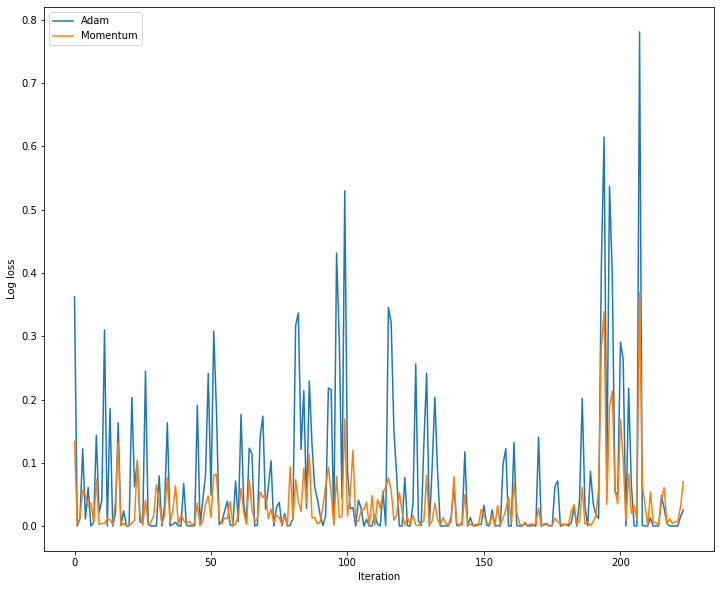

In [51]:
plt.figure(figsize=(12, 10))
batch = 8
train_adam = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)
train_moment = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.8).minimize(loss)
loss_adam = train(X, y, train_adam, batch_size=batch, epoch=3)
loss_moment = train(X, y, train_moment, batch_size=batch, epoch=3)
plt.plot(np.arange(len(X) // batch), loss_adam, label=f"Adam")
plt.plot(np.arange(len(X) // batch), loss_moment, label=f"Momentum")
print(f"Momentum: mean:{round(loss_moment.mean(), 4)} var:{round(loss_moment.var(), 4)}")
print(f"Adam: mean:{round(loss_adam.mean(), 4)} var:{round(loss_adam.var(), 4)}")
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Log loss')
plt.show()

Adam сходится до минимума быстрее, но в целом Моментум показывает себя стабильнее.

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

In [2]:
import warnings
warnings.simplefilter(action = 'ignore')

In [3]:
from mnist import load_dataset

X_train, y_train, X_test, y_test, _, _ = load_dataset()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

In [4]:
X_train.shape

(50000, 784)

In [13]:
from sklearn.metrics import accuracy_score
tf.reset_default_graph()
tf.random.set_random_seed(1568)
def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=16):
    with tf.Session() as sess:
        summary_writer = tf.summary.FileWriter("logs/1", sess.graph)
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size
        n_batch_test = len(X_test) // batch_size
        for epoch in range(5):
            loss_history_train = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_train[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_train.append(loss_)
        curr_summaries = sess.run([summaries])
        summary_writer.add_summary(curr_summaries, epoch)
        summary_writer.flush()

        for epoch in range(1):
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
            print("Test accuracy: ", accuracy_score(y_test, prediction_history))
    return loss_history_train, loss_history_test

X_input = tf.placeholder("float32", (None, 784)) 
y_input = tf.placeholder("int32", (None,)) 
training_ = tf.placeholder(tf.bool)
keep_prob = tf.placeholder(tf.float32)

tf.summary.scalar('curr_loss', loss)
summaries = tf.summary.merge_all()

layer1 = tf.layers.dense(X_input, 264, activation=tf.nn.relu, kernel_initializer=
                         tf.keras.initializers.he_normal())

layer2 = tf.layers.dense(layer1, 150, activation=tf.nn.relu, kernel_initializer=
                         tf.keras.initializers.he_normal())

layer3 = tf.layers.dense(layer2, 150, activation=tf.nn.relu, kernel_initializer=
                         tf.keras.initializers.he_normal())

layer4 = tf.layers.dense(tf.nn.relu(layer3 + layer2), 100, activation=tf.nn.relu, kernel_initializer=
                         tf.keras.initializers.he_normal())

layer5 = tf.layers.dense(layer4, 10)

...
predicted = tf.nn.softmax(layer5)

loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=layer5, labels=tf.one_hot(y_input, depth=10))
train_op = tf.train.AdamOptimizer().minimize(loss)

loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op)

TypeError: Fetch argument None has invalid type <class 'NoneType'>

Моя архитектура смогла достичь accuracy 0.975 за 5 эпох. В целом, это неплохо, потому что модель сильно не переобучается

#### Я использую Skip connection + Xavier and He Normal Initialization

## Задание 4 (0.1 баллов).

**Задание 4.1**. (0.1 баллов) Оставьте ниже смешную картинку (желательно про машинное обучение). Лучшую картинку мы поставим на аватарку чатика "Флуд про ИАД".

<img src="meme.jpg" style="width:10px:height=10px">

**Задание 4.2**. Напищите ниже фидбек по заданию и по курсу в целом. 

Задание интересное

Курс - 2 из 5 :(

Лекций нет, Курсера очень поверхностная, Семинар 1 раз в неделю 

Грусть(